# <font color=#3A86FF>Données nutritionnelles - Exploration </font>

## Sommaire

* [Chargement des donnees](#Chargement-des-donnees)  
* [Analyses univariees](#Analyses-univariees)
    * [Tendances centrales](#Tendances-centrales)
    * [Boxplots](#Boxplots)
    * [Histogrammes](#Histogrammes)
    * [Nutrition Score et Grade](#Nutrition-Score-et-Grade)
* [Analyse Multivariee](#Analyse-Multivariee)
* [ACP](#ACP)
    * [Préparation des données](#Preparation-des-donnees)
    * [Centrage et réduction](#Centrage-et-reduction)
    * [Calcul des composantes principales](#Calcul-des-composantes-principales)
    * [Eboulis des valeurs propres](#Eboulis-des-valeurs-propres)
    * [Cercle des corrélations](#Cercle-des-correlations)
    * [Choix du plan factoriel](#Choix-du-plan-factoriel)
    * [Projection des individus](#Projection-des-individus)
* [Conclusion](#Conclusion) 

## <font color=#FB5607>Chargement des donnees</font>

In [1]:
import pandas as pd
import time

now = time.time()
df = pd.read_csv("products_clean.csv", encoding="utf-8",sep=",", low_memory=False)

In [2]:
df.head()

,additives_tags,brands,main_category_fr,countries,states_tags,categories,categories_fr,categories_tags,countries_tags,additives_fr,...,brands_tags,saturated-fat_100g,sugars_100g,additives_n,energy_100g,nutrition-score-fr_100g,fat_100g,carbohydrates_100g,proteins_100g,cholesterol_100g
0,NaN,Ferme t'y R'nao,NaN,en:FR,"en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,NaN,NaN,en:france,NaN,...,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,US,"en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,NaN,en:united-states,NaN,...,NaN,28.57,14.29,0.0,2243.0,14.0,28.57,64.29,3.57,0.018
2,NaN,Torn & Glasser,NaN,US,"en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,NaN,en:united-states,NaN,...,torn-glasser,0.00,17.86,0.0,1941.0,0.0,17.86,60.71,17.86,0.000
3,NaN,Grizzlies,NaN,US,"en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,NaN,en:united-states,NaN,...,grizzlies,5.36,3.57,0.0,2540.0,12.0,57.14,17.86,17.86,NaN
4,NaN,Bob's Red Mill,NaN,US,"en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,NaN,en:united-states,NaN,...,bob-s-red-mill,NaN,NaN,0.0,1552.0,NaN,1.43,77.14,8.57,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   additives_tags           154680 non-null  object 
 1   brands                   292360 non-null  object 
 2   main_category_fr         84366 non-null   object 
 3   countries                320492 non-null  object 
 4   states_tags              320726 non-null  object 
 5   categories               84410 non-null   object 
 6   categories_fr            84411 non-null   object 
 7   categories_tags          84389 non-null   object 
 8   countries_tags           320492 non-null  object 
 9   additives_fr             154680 non-null  object 
 10  product_name             303010 non-null  object 
 11  additives                248905 non-null  object 
 12  states                   320726 non-null  object 
 13  main_category            84366 non-null   object 
 14  stat

In [4]:
import numpy as np

# identification des colonnes numériques et qualitatives
colonnesNum=df.select_dtypes(np.number).columns.tolist()
colonnesQual=df.select_dtypes('O').columns.tolist()

## <font color=#FB5607>Analyses univariees</font>

### Tendances centrales

In [5]:
# echantillon de données numériques
df[colonnesNum].sample(10)

,saturated-fat_100g,sugars_100g,additives_n,energy_100g,nutrition-score-fr_100g,fat_100g,carbohydrates_100g,proteins_100g,cholesterol_100g
96128,0.00,3.64,0.0,113.0,-1.0,0.00,5.45,1.82,0.000
296823,1.10,40.00,8.0,1853.0,12.0,23.00,54.00,4.00,NaN
86848,6.76,43.24,3.0,1640.0,21.0,18.92,55.41,2.70,0.034
32429,0.76,0.00,0.0,1050.0,2.0,3.53,45.88,8.24,0.000
230178,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
45782,5.00,26.67,4.0,1812.0,12.0,11.67,76.67,6.67,0.000
248247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14811,0.00,4.35,4.0,1456.0,9.0,0.00,78.26,8.70,0.000
257376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74998,0.00,18.00,6.0,669.0,2.0,2.00,31.00,5.00,0.000


In [6]:
# tableau de tendances (mediane, moyenne, ecart-type, valeurs uniques)
df[colonnesNum].agg(['size','median','mean', 'std','nunique']).round(0)

,saturated-fat_100g,sugars_100g,additives_n,energy_100g,nutrition-score-fr_100g,fat_100g,carbohydrates_100g,proteins_100g,cholesterol_100g
size,320772.0,320772.0,320772.0,320772.0,320772.0,320772.0,320772.0,320772.0,320772.0
median,2.0,6.0,1.0,1100.0,10.0,5.0,21.0,5.0,0.0
mean,5.0,16.0,2.0,1142.0,9.0,13.0,32.0,7.0,0.0
std,8.0,22.0,3.0,6447.0,9.0,18.0,30.0,8.0,0.0
nunique,2197.0,4068.0,31.0,3997.0,55.0,3378.0,5416.0,2503.0,537.0


### Boxplots

In [7]:
from helpers import *

# exclusion des outliers sur les variables quantitatives
for name in colonnesNum:
    mask=maskOutliers(df[name])
    df.loc[mask,name]=0

saturated-fat_100g
sugars_100g
additives_n
energy_100g
nutrition-score-fr_100g
fat_100g
carbohydrates_100g
proteins_100g
cholesterol_100g


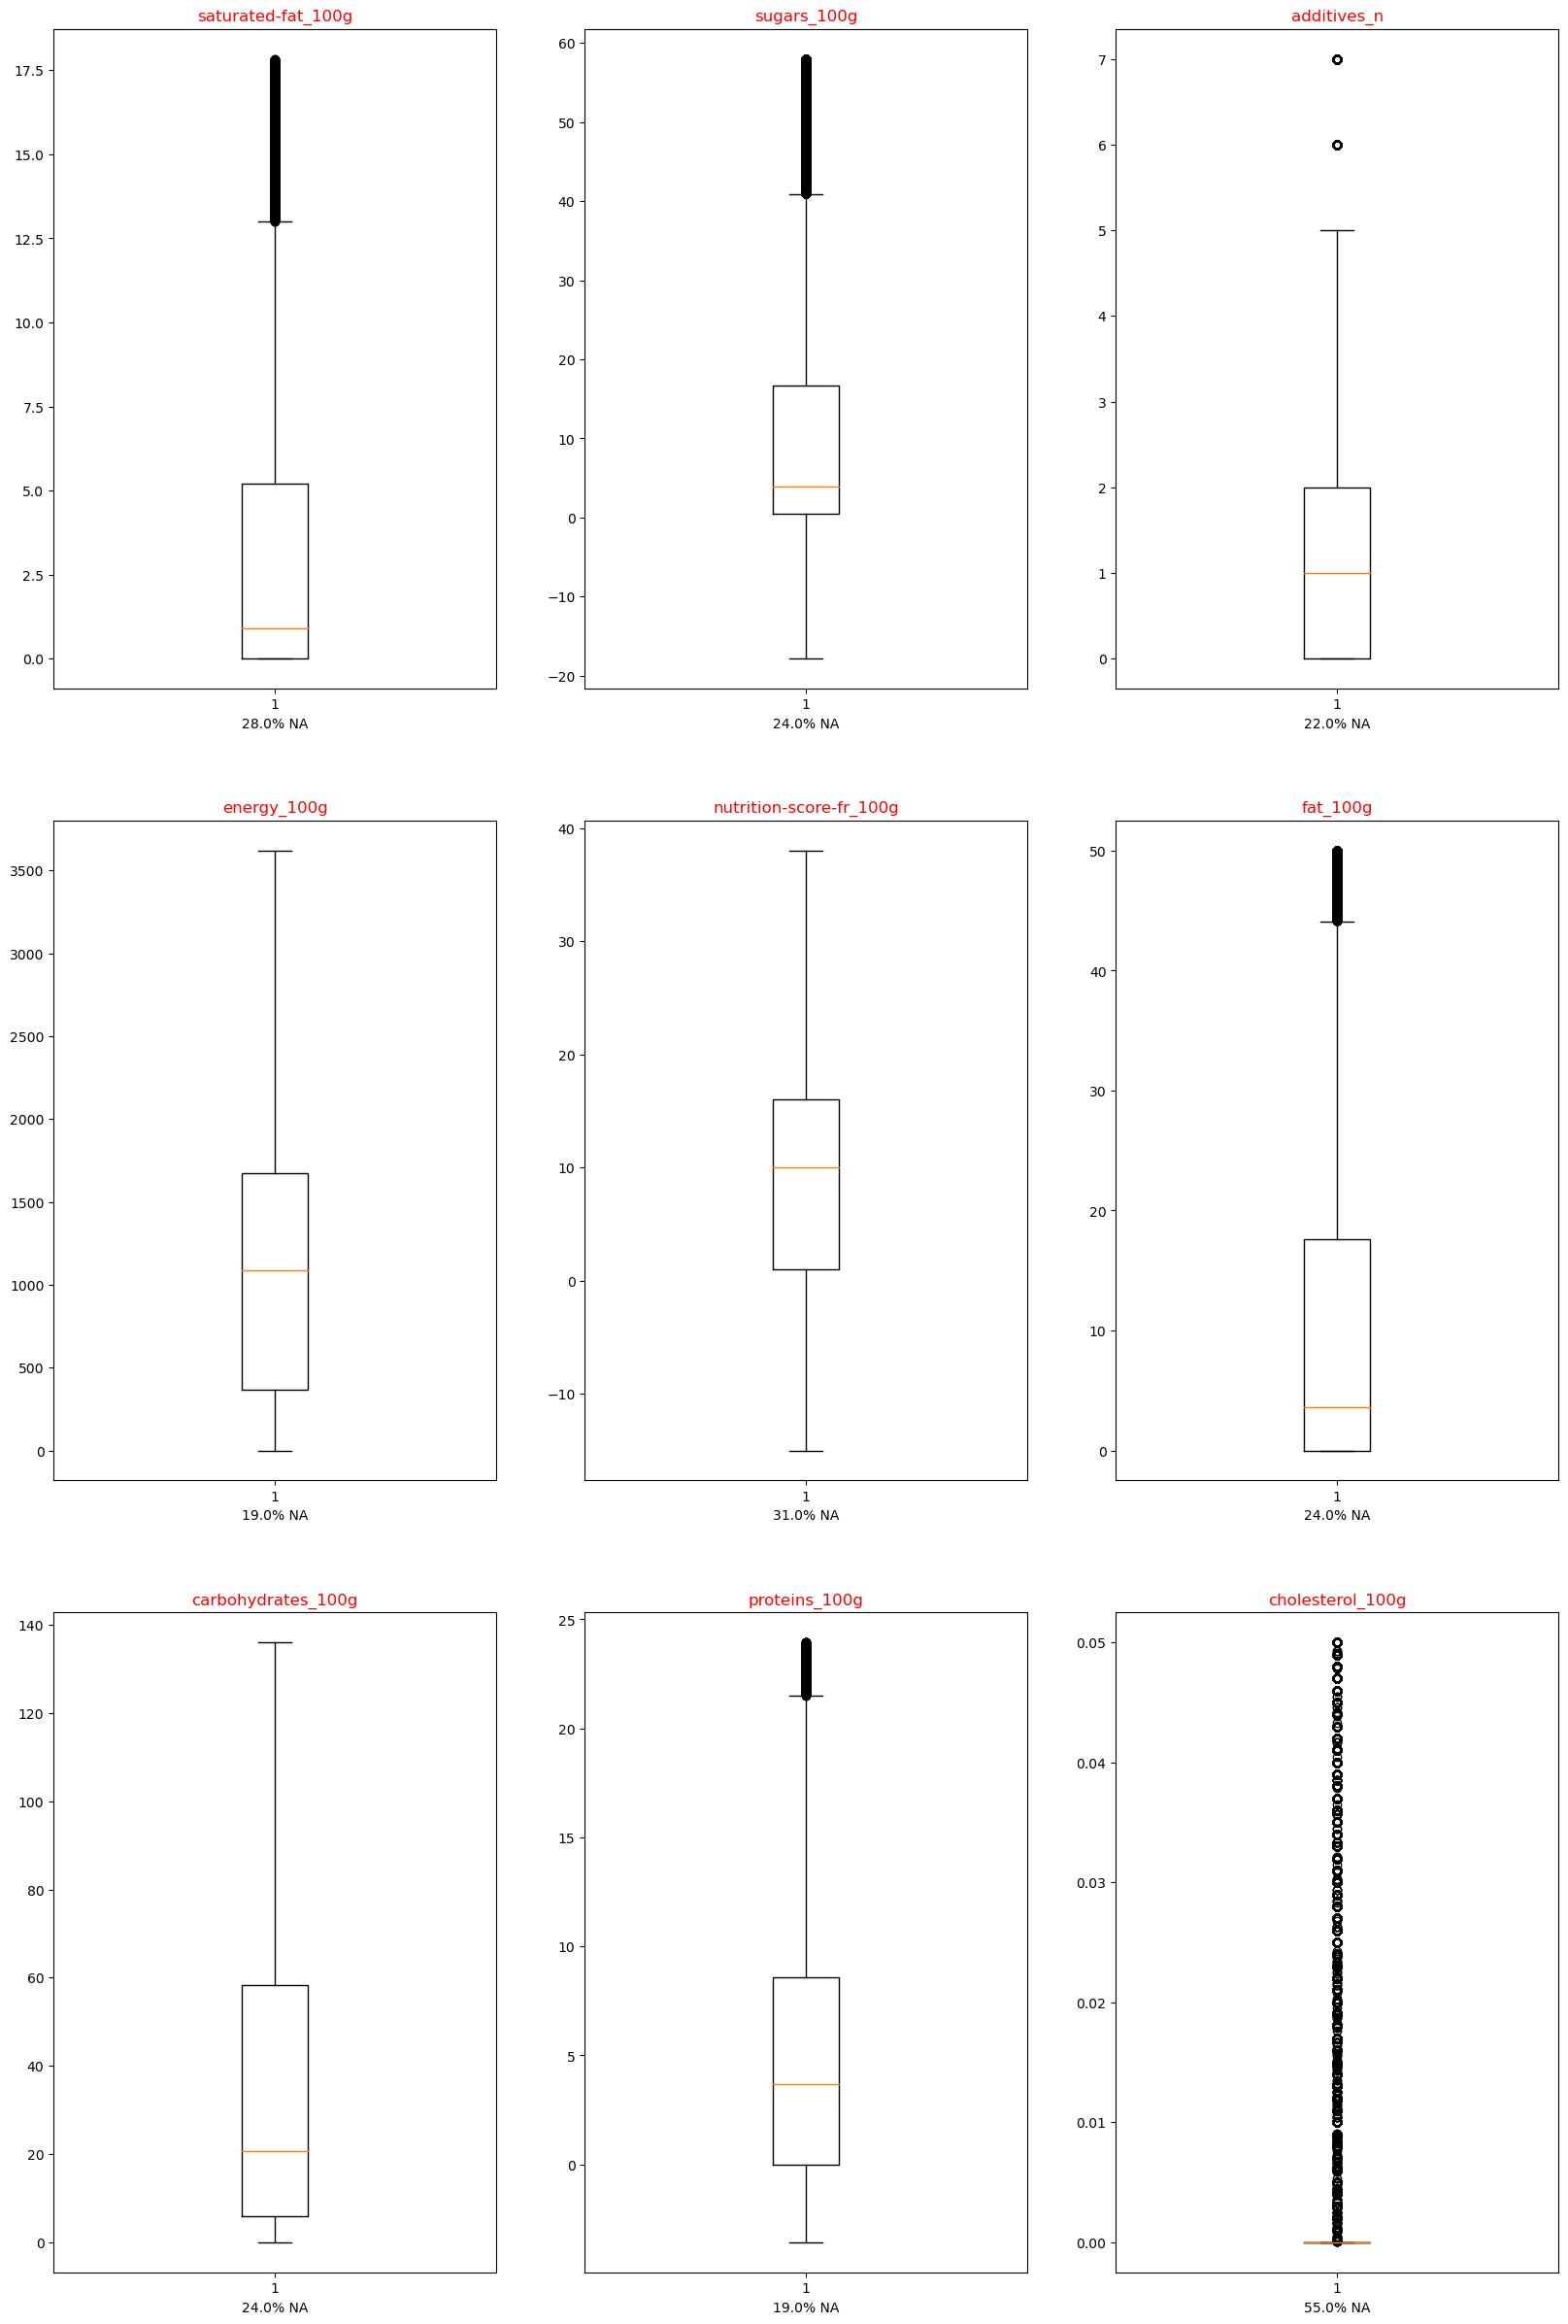

In [8]:
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.rcParams["figure.figsize"] = (100,40)

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(20,30))
axes=axes.flatten()

i=0
for x in colonnesNum:
        print(str(x)) #debug
        # on dessine le boxplot en excluant les valeurs manquantes pour chaque variable quantitative
        axes[i].boxplot(df[x].dropna())
        axes[i].set_title(x,color='red')
        axes[i].set_xlabel(str(round(100*df[x].isna().sum(axis=0)/len(df[x]),0))+'% NA')
        i+=1

On remarquera le boxplot bien équilibré du nutrition-score-fr_100g, comparé aux autres.
Ainsi que la distribution sans tendances du cholesterol_100g.

### Histogrammes

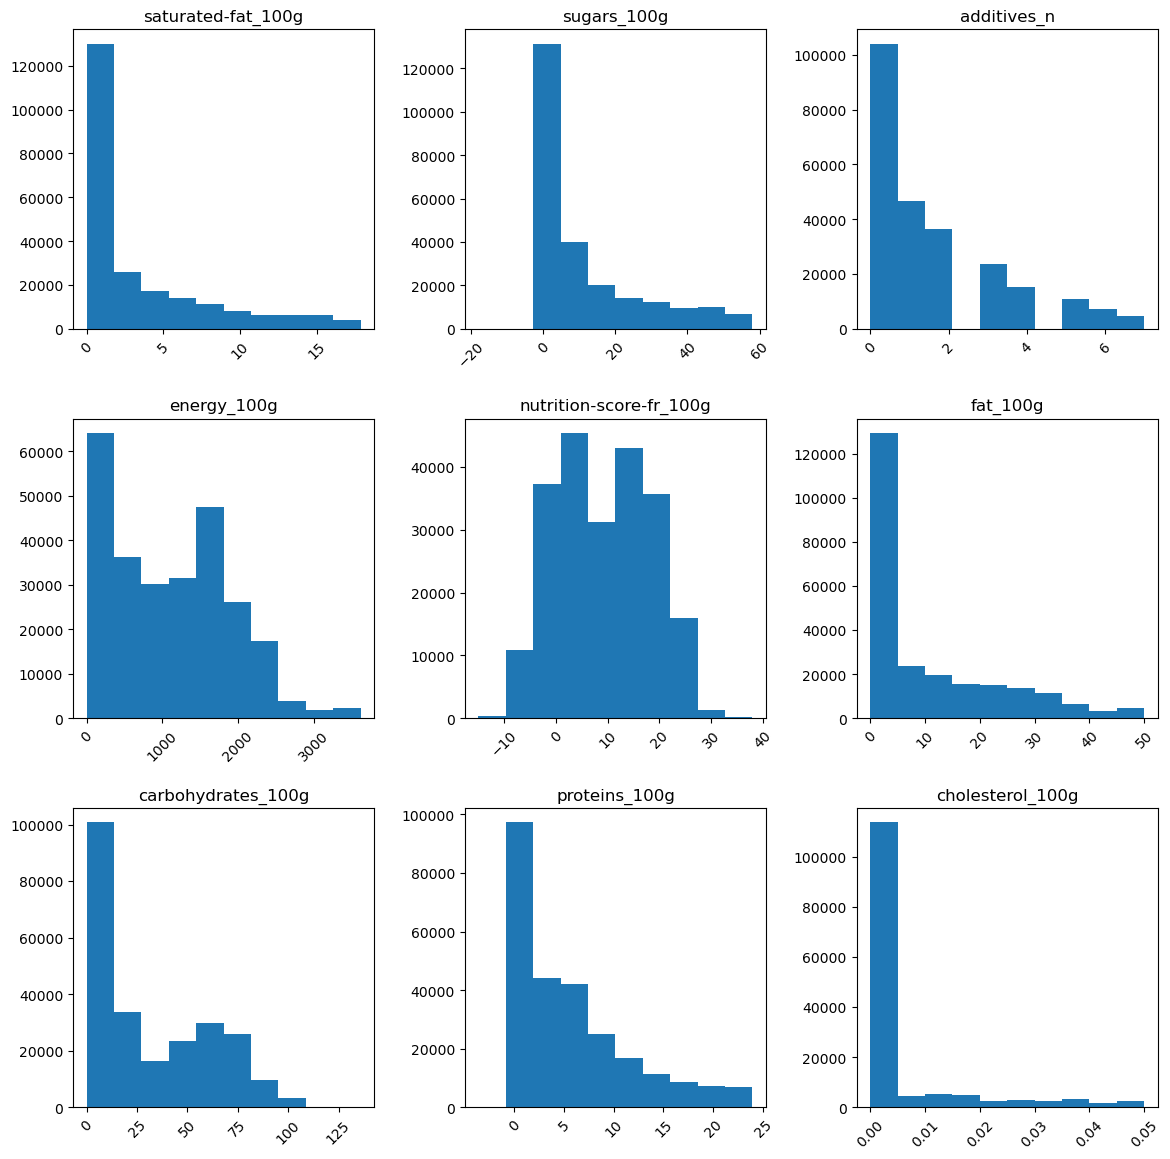

In [9]:
plt.rcParams["axes.grid"] = False
df.hist(figsize=(14,14), xrot=45,grid=False)
plt.show()

On remarque une distribution bimodale sur le nutrition-score-fr_100g
-> on aurant potentiellement deux groupes de produits (ceux avec des scores autour de 0 et ceux autour de 15)

### Nutrition Score et Grade

On cherche ici à savoir si le nutrition-score-fr_100g peut expliquer le nutrition_grade_fr par un essai de modelisation par regression linéaire

In [10]:
df.groupby("nutrition_grade_fr").agg({
    "nutrition-score-fr_100g":"mean"
})

,nutrition-score-fr_100g
nutrition_grade_fr,
a,-3.407644
b,0.906673
c,6.367561
d,14.066934
e,21.958587


In [11]:
# conversion numerique de la note alphabetique de nutrition
gradeNotationMapper={"a":5,"b":4,"c":3,"d":2,"e":1}
nutritionGrade=df['nutrition_grade_fr'] # note alphabetique de nutrition par individu
nutritionNote=nutritionGrade.replace(gradeNotationMapper)
df['nutritionNote']=nutritionNote
dfSub=df[['nutritionNote','nutrition-score-fr_100g']].dropna()

In [12]:
import statsmodels.api as sm

# Centrage Réduction
dfSubStandardized = (dfSub - dfSub.mean()) / dfSub.std()

X = dfSubStandardized[['nutrition-score-fr_100g']]
# ajout de la constante explicative
X=sm.add_constant(X)
y=dfSubStandardized['nutritionNote']
# definition du modele
model = sm.OLS(y,X)

# fittage du modele
results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          nutritionNote   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.398e+06
Date:                Sat, 06 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:45:34   Log-Likelihood:                -40519.
No. Observations:              221210   AIC:                         8.104e+04
Df Residuals:                  221208   BIC:                         8.106e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

Résultats du calcul de régression linéaire sur 136607 observations:
* $R^2$ elevé => score de prediction elevé
* Coefficient negatif => plus la note est mauvaise (proche de e), plus le score est elevé
* P-value associé au coefficient teste l'hypothese nulle que le coefficient n'a pas d'effet. Ici il vaut 0, donc le coefficient est pertinent

Représentation graphique des valeurs prédites par le modele par rapport aux données réelles

In [13]:
# valeurs prédites de nutritionNote
results.fittedvalues = results.params['nutrition-score-fr_100g'] * dfSubStandardized['nutrition-score-fr_100g'] + results.params['const']
# valeurs résiduelles
results.resid = dfSubStandardized['nutritionNote'] - results.fittedvalues
# on ajoute les valeurs prédites dans le dataFrame
dfSubStandardized['fitted'] = results.fittedvalues

#dfSub.sort_values(by = 'nutrition-score-fr_100g', ascending = True, inplace = True)

Text(0.5, 1.0, "Regression linéaire \n 'nutritionNote~nutrition-score-fr_100g'")

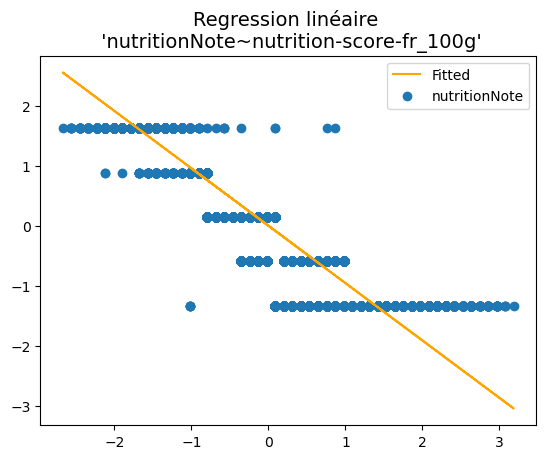

In [14]:
plt.rcdefaults()
plt.scatter(dfSubStandardized['nutrition-score-fr_100g'], dfSubStandardized['nutritionNote'], label = 'nutritionNote' )
plt.plot(dfSubStandardized['nutrition-score-fr_100g'], dfSubStandardized['fitted'], label = 'Fitted',color='orange' )
plt.legend()
plt.title("Regression linéaire \n 'nutritionNote~nutrition-score-fr_100g'",fontsize=14,fontweight='normal')

## <font color=#FB5607>Analyse Multivariee</font>

On constate que le dataframe dfQual contient des centaines de milliers d'observations distinctes par variables.\
La variable "nutrition_grade_fr" presente 5 degré de notation.
Nous voulons voir si la marque (brands) ou les additifs (additives_fr) peuvent expliquer la notation.

In [15]:
# on selectionne les variables qualitatives
dfQual=df[colonnesQual]
dfQual.shape

(320772, 21)

In [16]:
dfQual.describe()

,additives_tags,brands,main_category_fr,countries,states_tags,categories,categories_fr,categories_tags,countries_tags,additives_fr,...,additives,states,main_category,states_fr,creator,nutrition_grade_fr,serving_size,quantity,countries_fr,brands_tags
count,154680,292360,84366,320492,320726,84410,84411,84389,320492,154680,...,248905,320726,84366,320726,320770,221210,211331,104819,320492,292352
unique,41537,58784,3543,1434,1021,36982,21152,21142,725,41537,...,196069,1021,3543,1021,3535,5,25423,13826,722,50253
top,en:e322,Carrefour,Boissons,US,"en:to-be-completed,en:nutrition-facts-complete...","Snacks sucrés,Biscuits et gâteaux,Biscuits","Snacks sucrés,Biscuits et gâteaux,Biscuits","en:sugary-snacks,en:biscuits-and-cakes,en:bisc...",en:united-states,E322 - Lécithines,...,[ extra-virgin-olive-oil -> en:extra-virgin-o...,"en:to-be-completed, en:nutrition-facts-complet...",en:beverages,"A compléter,Informations nutritionnelles compl...",usda-ndb-import,d,240 ml (8 fl oz),500 g,États-Unis,carrefour
freq,8264,2978,6054,169928,168905,301,802,802,172998,8264,...,397,168905,6054,168905,169868,62763,5496,4669,172998,3149


Utilisons la regression lineaire par la méthode des moindres carrés pour déterminer si les variables explicatives "brands" et "additives_fr" peuvent expliquer "nutrition_grade_fr"

### Tableau de contingence

Pour pouvoir la corrélation entre ces variables catégorielles, nous calculons le tableau de contingences et traduisons les valeurs de "nutrition_grade_fr" en notes numériques

In [17]:
#%%timeit
tableauContingence=dfQual.groupby("nutrition_grade_fr").agg({
    "brands":"count",
    "additives_fr":"count"
})
tableauContingence

,brands,additives_fr
nutrition_grade_fr,,
a,34975,13239
b,33501,17754
c,44526,25687
d,61526,39721
e,42044,29781


In [18]:
tableauContingence['nutrition_grade_fr']=tableauContingence.index

In [19]:
tableauContingence.loc[tableauContingence.nutrition_grade_fr=='a','nutrition_grade_fr']=0
tableauContingence.loc[tableauContingence.nutrition_grade_fr=='b','nutrition_grade_fr']=1
tableauContingence.loc[tableauContingence.nutrition_grade_fr=='c','nutrition_grade_fr']=2
tableauContingence.loc[tableauContingence.nutrition_grade_fr=='d','nutrition_grade_fr']=3
tableauContingence.loc[tableauContingence.nutrition_grade_fr=='e','nutrition_grade_fr']=4
tableauContingence

,brands,additives_fr,nutrition_grade_fr
nutrition_grade_fr,,,
a,34975,13239,0
b,33501,17754,1
c,44526,25687,2
d,61526,39721,3
e,42044,29781,4


Utilisons la regression lineaire par la méthode des moindres carrés pour déterminer si les variables explicatives "brands" et "additives_fr" peuvent expliquer "nutrition_grade_fr"

In [20]:
import statsmodels.api as sm
X = tableauContingence[['brands','additives_fr']]
X=sm.add_constant(X)
y=tableauContingence['nutrition_grade_fr']
model = sm.OLS(y.astype('int64'),X)

results=model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     nutrition_grade_fr   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     23.16
Date:                Sat, 06 Mar 2021   Prob (F-statistic):             0.0414
Time:                        10:45:37   Log-Likelihood:               -0.86622
No. Observations:                   5   AIC:                             7.732
Df Residuals:                       2   BIC:                             6.561
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.2796      1.160      1.965   

/Users/hui-guan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


On remarque une valeur Adj.R-Squared très elevée indiquant un fort score de prediction.\
Les coefficients des valeurs explicatives sont proches de 0, avec une p-value proche de 0.05, on ne peut pas expliquer de manière fiable le nutrition_grade_fr par les variables brands et additives_fr

## <font color=#FB5607>ACP</font>

### Preparation des donnees

In [21]:
# filtrage sur les variables quantitatives
dataPCA=df[colonnesNum].dropna()
nomsIndividus=df.iloc[dataPCA.index,df.columns.get_loc('product_name')] # Individus
nutritionGrade=df.iloc[dataPCA.index,df.columns.get_loc('nutrition_grade_fr')] # note alphabetique de nutrition par individu
variables=dataPCA.columns # Variables
X=dataPCA.values # Valeurs

In [22]:
dataPCA.sample(5)

,saturated-fat_100g,sugars_100g,additives_n,energy_100g,nutrition-score-fr_100g,fat_100g,carbohydrates_100g,proteins_100g,cholesterol_100g
79441,5.49,9.15,7.0,1071.0,15.0,11.59,29.27,9.15,0.021
135633,0.00,33.33,4.0,2230.0,33.0,30.00,60.00,0.00,0.000
156091,0.00,35.71,0.0,2489.0,19.0,40.48,50.00,7.14,0.000
83211,0.00,0.00,2.0,372.0,11.0,7.14,3.57,0.00,0.000
141120,5.63,9.86,1.0,649.0,4.0,9.15,10.56,7.04,0.021


### Centrage et reduction

In [23]:
from sklearn import preprocessing
from sklearn import decomposition

In [24]:
centreReduit = preprocessing.StandardScaler().fit(X)
XCentreReduit = centreReduit.transform(X)
XCentreReduit.shape

(136607, 9)

### Calcul des composantes principales

In [25]:
n_comp=9 # n_comp <= nombre de variables
pca = decomposition.PCA(n_components=n_comp)
pca.fit(XCentreReduit)

PCA(n_components=9)

### Eboulis des valeurs propres

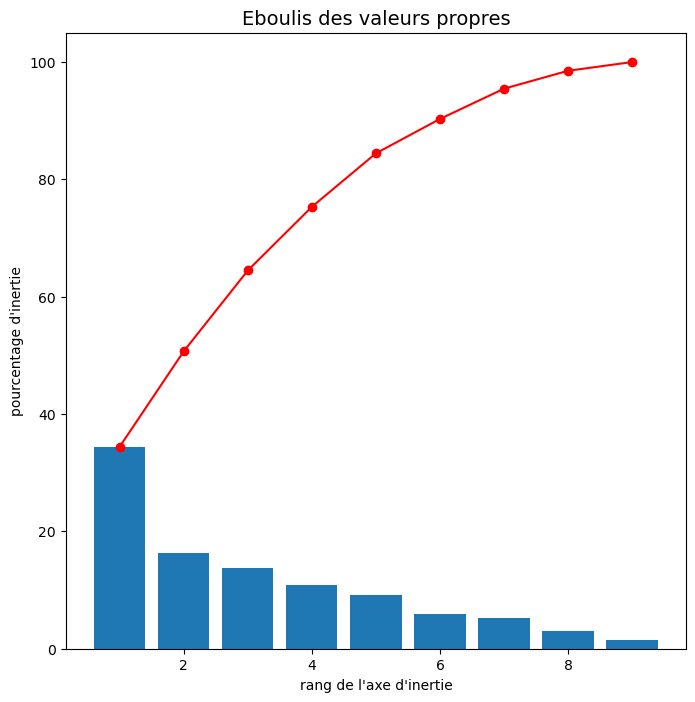

In [26]:
from matplotlib import pyplot as plt

plt.style.use('default')
# taille du schema
plt.rcParams["figure.figsize"] = (8,8)

vectVarianceExpliquee = pca.explained_variance_ratio_*100 # renvoie les variences expliquées pour chacune des dimensions
plt.bar(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee)
plt.plot(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres",fontsize=14,fontweight='normal')
plt.show()

In [27]:
composantesPrincipales = pca.components_ # triés par variance expliquée

### Choix du plan factoriel

In [28]:
# Selection du plan Factoriel
#dimension 1
d1=0
#dimension 2
d2=1

### Cercle des correlations

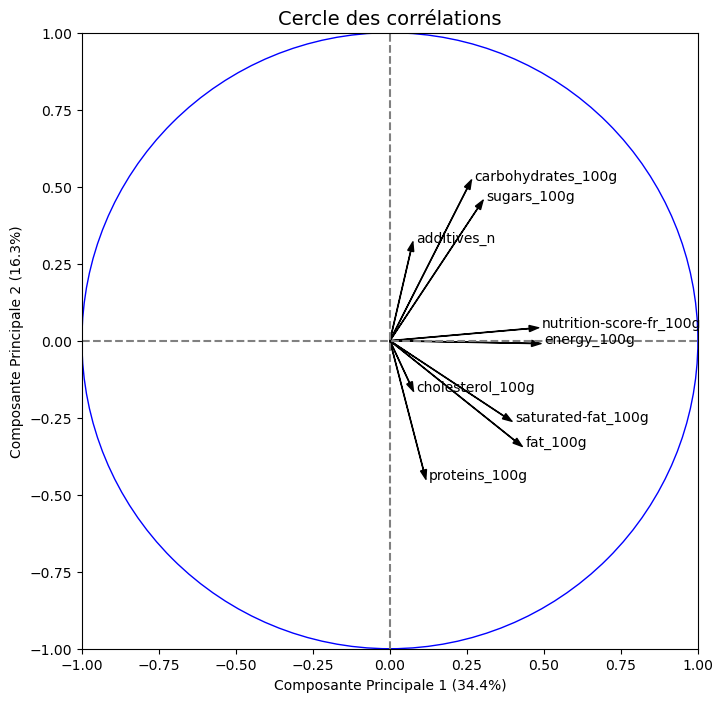

In [29]:
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.style.use('default')
# taille du schema
plt.rcParams["figure.figsize"] = (8,8)

fig, ax = plt.subplots()

# configuration de la bordure
plt.xlim(-1,1)
plt.ylim(-1,1)

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# libelles des axes
plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Cercle des corrélations',color="black",fontsize=14,fontweight='normal')
# afficher le cercle
cercle = plt.Circle((0,0),radius=1, color='b', fill=False)
ax.set_aspect(1)
ax.add_patch(cercle)


#placement des étiquettes des p variables + fleches (partant du centre vers les points projetés)
for i in range(len(variables)):
    plt.annotate(variables[i],xy =(composantesPrincipales[d1][i],composantesPrincipales[d2][i]),xytext =(composantesPrincipales[d1][i]+0.01,composantesPrincipales[d2][i]),arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3")) 
    plt.arrow(0,0,composantesPrincipales[d1][i],composantesPrincipales[d2][i].astype(np.float),length_includes_head=True,head_width=0.02, head_length=0.03,color="black")

### Projection des individus

In [30]:
# Projection des individus sur les composantes principales
XProjete = pca.transform(XCentreReduit)
print(f"dim Projeté:{XProjete.shape}- dim Origine:{XCentreReduit.shape}")

dim Projeté:(136607, 9)- dim Origine:(136607, 9)


In [31]:
# preparation de la palette de couleur qui reprend les codes couleurs hexa du logo nutriscore
custom_palette = {
'd': '#E08530',#Orange
 'c': '#F6CB45',#Jaune
 'e': '#D44B29',#Rouge
 'a': '#387E47',#Vert foncé
 'b': '#91B849' #Vert   
}
custom_palette['a']

'#387E47'

In [32]:
list(custom_palette.keys())

['d', 'c', 'e', 'a', 'b']

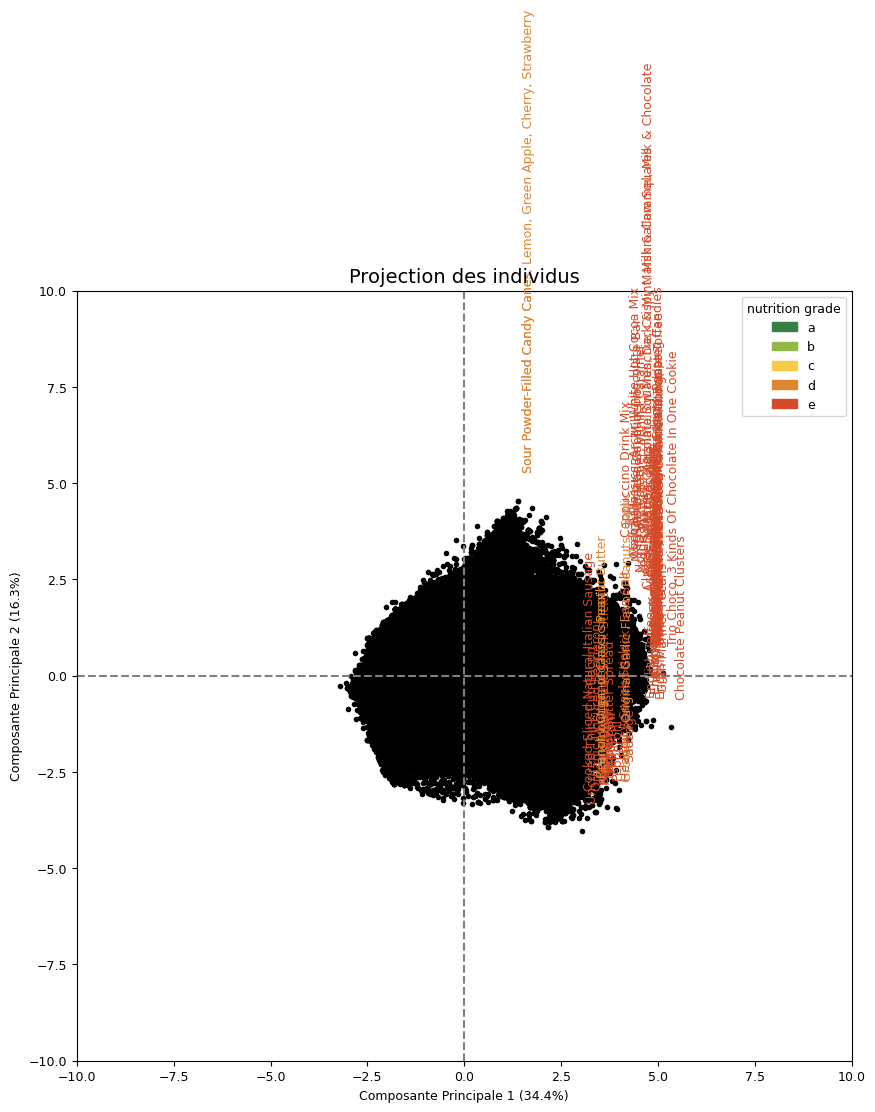

In [33]:
# visualisation
from matplotlib import pyplot as plt

# taille du graphique
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = '9.0'

# configuration de la bordure
plt.xlim(-10,10)
plt.ylim(-10,10)

# affichage des lignes horizontales et verticales
plt.plot([-10, 10], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-10, 10], color='grey', ls='--')

plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Projection des individus',fontsize=14,fontweight='normal')



# representer le nuage projeté sur le 1er plan factoriel (composé des 2 premieres composantes principales 0 et 1)
plt.scatter(XProjete[:,d1],XProjete[:,d2],marker=".",color="black")

for i in range(len(nomsIndividus)):   # nombre d'individus
    
    p=np.array([XProjete[i,d1],XProjete[i,d2]])

    color=nutritionGrade.values[i]

    # on utilise la distance euclidienne pour n'afficher les labels que pour les individus loin du centre
    distance= np.linalg.norm(p-np.array([0,0]))

    if distance>4.7:
        label=nomsIndividus.values[i]
        #print(f"label[{i}]:{label} | test:{not(pd.isnull(label))} | color:{color}") # debug
        if not pd.isnull(label):
            plt.text(XProjete[i,d1]+0.1, XProjete[i,d2]+0.8, label ,rotation=90,color=custom_palette[color])
    #plt.annotate(nomsIndividus.values[i],xy =(XProjete[i,0],XProjete[i,1]),xytext =(XProjete[i,0],XProjete[i,1]))

import matplotlib.patches as mpatches

a_patch = mpatches.Patch(color=custom_palette['a'], label='a')
b_patch = mpatches.Patch(color=custom_palette['b'], label='b')
c_patch = mpatches.Patch(color=custom_palette['c'], label='c')
d_patch = mpatches.Patch(color=custom_palette['d'], label='d')
e_patch = mpatches.Patch(color=custom_palette['e'], label='e')


plt.legend(title="nutrition grade",handles=[a_patch, b_patch, c_patch, d_patch, e_patch])

#import os
#os.system('say "jai fini de dessiner"')

Observations:
* sur l'axe du nutrition score, la note de nutrition ne semble pas correlee
* la composante energy / nutrition_score explique toute seule une composante
* sugars et carbohydrates (glucides) expliquent fortement l'axe vertical positif
* le gras explique modéremment l'axe vertical negatif en opposition avec les glucides/sucres

In [34]:
time.time() - now

16.1058030128479

## <font color=#FB5607>Conclusion</font>

On peut distinguer 3 axes de pour definir la qualité nutritionnelle d'un produit alimentaire:
* les aliments riches en protéines
* les aliments riches en sucre lent/rapide
* les aliments energetiques